### Importing Libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Reading Data through pandas

In [11]:
df = pd.read_csv("perceptron_toydata.txt",delimiter='\t')

### Converting datafreame to numpy arrays

In [14]:
arr = df.to_numpy()

### Splittig Dataset into X and y (where X stands for features and y stands for tag) 

In [17]:
X = arr[:,:2]
y = arr[:,2]
y = y.astype(np.int32)

### Shuffling Indexes

In [20]:
shuffled_idx = np.arange(np.shape(y)[0])
shuffle_rng = np.random.RandomState(123)
shuffle_rng.shuffle(shuffled_idx)
X,y = X[shuffled_idx],y[shuffled_idx]

### Spliiting Dataset into Training and Test dataset

In [23]:
X_train,X_test = X[:70],X[70:]
y_train,y_test = y[:70],y[70:]

### Normalizing dataset

In [26]:
mean,std = X_train.mean(axis=0),X_train.std(axis=0)
X_train = (X_train - mean)/std
X_test = (X_test-mean)/std

### Plotting Training data

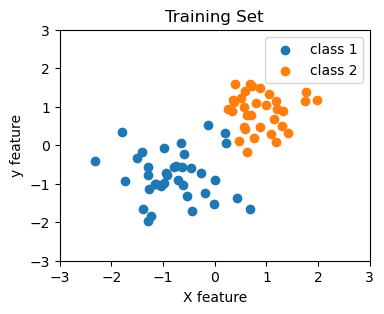

In [29]:
plt.figure(figsize=(4, 3))
plt.scatter(X_train[y_train==0,0],X_train[y_train==0,1],label = "class 1")
plt.scatter(X_train[y_train==1,0],X_train[y_train==1,1],label = "class 2")
plt.legend()
plt.title("Training Set")
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.xlabel("X feature")
plt.ylabel("y feature")
plt.show()

### Plotting Test Data

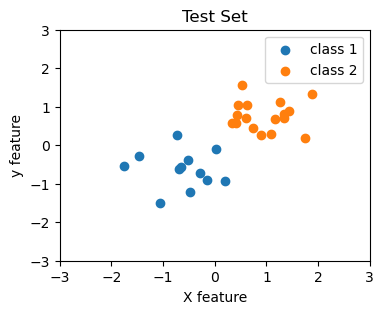

In [32]:
plt.figure(figsize=(4, 3))
plt.scatter(X_test[y_test==0,0],X_test[y_test==0,1],label = "class 1")
plt.scatter(X_test[y_test==1,0],X_test[y_test==1,1],label = "class 2")
plt.legend()
plt.title("Test Set")
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.xlabel("X feature")
plt.ylabel("y feature")
plt.show()

### Main Perceptron Algorithm Class

In [224]:
class Perceptron():
    
    def __init__(self,num_features):
        self.num_features = num_features
        self.weights = np.zeros((num_features,1),dtype= np.float64)
        self.bias = np.zeros(1,dtype= np.float64)
    
    def forward(self,x):
        linear = np.dot(x,self.weights) + self.bias
        predictions = np.where(linear>0.,1,0)
        return predictions
    
    def backward(self,x,y):
        predictions = self.forward(x)
        errors = y - predictions
        return errors
    
    def train(self,x,y,epochs):
        for e in range(epochs):
            for i in range(y.shape[0]):
                errors = self.backward(x[i].reshape(1,self.num_features),y[i]).reshape(-1)
                self.weights += (errors*x[i]).reshape(self.num_features,1)
                self.bias += errors

    def evaluate(self,x,y):
        predictions = self.forward(x).reshape(-1)
        accuracy = np.sum(predictions == y)/y.shape[0]
        return accuracy        

### Updated Perceptron Algorithm Class

In [481]:
class Perceptron_updated:
    def __init__(self,eta=0.01,n_iter=50,random_state=1):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self,X,y):
        rgen = np.random.RandomState(99)
        self.w = rgen.normal(loc=0.0,scale=0.01,size=(X.shape[1],1))
        self.b = np.float64(0.)
        for e in range(self.n_iter):
            error = 0
            for i,target in zip(X,y):
                i = i.reshape(-1, 1)
                update = (self.eta*(target - self.predict(i.reshape(1,X.shape[1])))).reshape(-1)
                self.w += (update*i).reshape(X.shape[1],1)
                self.b += update
        return self 

    def net_input(self,X):
        return np.dot(X,self.w) + self.b

    def predict(self,X):
        return np.where(self.net_input(X)>0.0,1,0)            

    def evaluate(self,x,y):
        predictions = self.predict(x).reshape(-1)
        accuracy = np.sum(predictions == y)/y.shape[0]
        return accuracy  

### Training Perceptron algorithm

In [484]:
ppn = Perceptron(num_features=2)
ppn.train(x=X_train,y=y_train,epochs=5)
print(f"Weights: {ppn.weights}")
print(f"Bias: {ppn.bias}")

Weights: [[1.9807328 ]
 [0.97627138]]
Bias: [-1.]


### Training Updated Perceptron algorithm

In [487]:
ppn1 = Perceptron_updated()
ppn1.fit(X=X_train,y=y_train,)
print(f"Weights: {ppn1.w}")
print(f"Bias: {ppn1.b}")

Weights: [[0.02101081]
 [0.00648934]]
Bias: [-0.01]


### Evaluting Updated Perceptron Algorithm on Training data

In [490]:
test_acc = ppn1.evaluate(X_train,y_train)
print(f"Test Accuracy is {test_acc*100}")

Test Accuracy is 100.0


### Evaluting Perceptron Algorithm on Training data

In [493]:
test_acc = ppn.evaluate(X_train,y_train)
print(f"Test Accuracy is {test_acc*100}")

Test Accuracy is 100.0


### Evaluting Updated Perceptron ALgorithm on Test data

In [496]:
test_acc = ppn1.evaluate(X_test,y_test)
print(f"Test Accuracy is {test_acc*100}")

Test Accuracy is 100.0


### Evaluting Perceptron ALgorithm on Test data

In [499]:
test_acc = ppn.evaluate(X_test,y_test)
print(f"Test Accuracy is {test_acc*100}")

Test Accuracy is 100.0


### Plotting Decision Boundary 

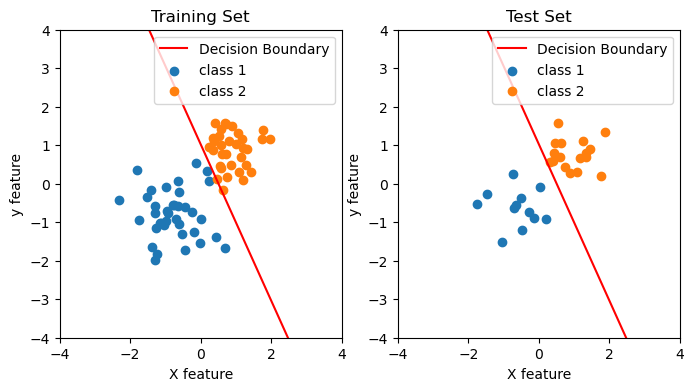

In [502]:
w1,w2 = ppn.weights.reshape(-1)
b = ppn.bias.reshape(-1)
x1 = np.linspace(-3,3,100)
x2 = -(w1/w2) * x1 - (b/w2)
fig,ax = plt.subplots(1,2,sharex = True,figsize=(8,4))
ax[0].plot(x1,x2,label="Decision Boundary",color='red')
ax[1].plot(x1,x2,label="Decision Boundary",color='red')
ax[0].scatter(X_train[y_train==0,0],X_train[y_train==0,1],label = "class 1")
ax[0].scatter(X_train[y_train==1,0],X_train[y_train==1,1],label = "class 2")
ax[1].scatter(X_test[y_test==0,0],X_test[y_test==0,1],label = "class 1")
ax[1].scatter(X_test[y_test==1,0],X_test[y_test==1,1],label = "class 2")
ax[0].legend(loc="upper right")
ax[1].legend(loc="upper right")
ax[0].set_title("Training Set")
ax[1].set_title("Test Set")
ax[0].set_xlim([-4,4])
ax[0].set_ylim([-4,4])
ax[1].set_xlim([-4,4])
ax[1].set_ylim([-4,4])
ax[0].set_xlabel("X feature")
ax[0].set_ylabel("y feature")
ax[1].set_xlabel("X feature")
ax[1].set_ylabel("y feature")
plt.show()

### Plotting Decision Boundary for Updated Perceptron Algorithm

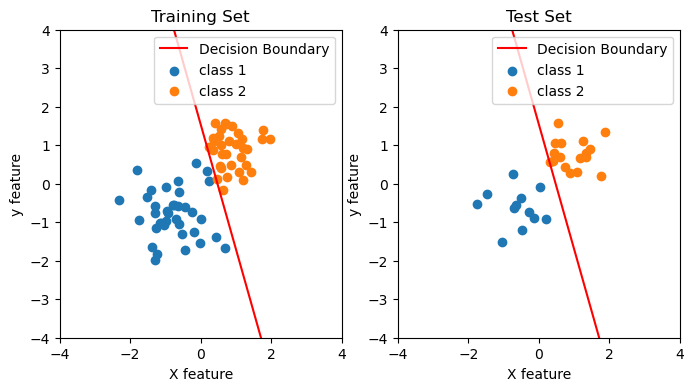

In [505]:
w1,w2 = ppn1.w.reshape(-1)
b = ppn1.b.reshape(-1)
x1 = np.linspace(-3,3,100)
x2 = -(w1/w2) * x1 - (b/w2)
fig,ax = plt.subplots(1,2,sharex = True,figsize=(8,4))
ax[0].plot(x1,x2,label="Decision Boundary",color='red')
ax[1].plot(x1,x2,label="Decision Boundary",color='red')
ax[0].scatter(X_train[y_train==0,0],X_train[y_train==0,1],label = "class 1")
ax[0].scatter(X_train[y_train==1,0],X_train[y_train==1,1],label = "class 2")
ax[1].scatter(X_test[y_test==0,0],X_test[y_test==0,1],label = "class 1")
ax[1].scatter(X_test[y_test==1,0],X_test[y_test==1,1],label = "class 2")
ax[0].legend(loc="upper right")
ax[1].legend(loc="upper right")
ax[0].set_title("Training Set")
ax[1].set_title("Test Set")
ax[0].set_xlim([-4,4])
ax[0].set_ylim([-4,4])
ax[1].set_xlim([-4,4])
ax[1].set_ylim([-4,4])
ax[0].set_xlabel("X feature")
ax[0].set_ylabel("y feature")
ax[1].set_xlabel("X feature")
ax[1].set_ylabel("y feature")
plt.show()